In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud
from PIL import Image


nltk.download('stopwords')
stop_words = stopwords.words('english')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /Users/d3r/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/d3r/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/d3r/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df_tweets = pd.read_csv('1st_group.csv', encoding='utf-8')

In [3]:
def remove_rt(x): return re.sub('RT @\w+: ', ' ', x)
def rt(x): return re.sub('(@[A-Za-z0–9]+)|[^a-zA-Z]', ' ', x)


df_tweets['content'] = df_tweets['content'].map(rt).map(remove_rt)
df_tweets['content'] = df_tweets['content'].str.lower()
X = df_tweets['content']


In [4]:
cleaned_data = []
manually_excluded = ['co', 'amp', 'https']
for i in range(len(X)):
    tweet = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    tweet = tweet.lower().split()
    tweet = [word for word in tweet if (
        word not in stop_words) and (word not in manually_excluded)]
    tweet = [word for word in tweet if (wordnet.synsets(word))]
    tweet = ' '.join(tweet)
    cleaned_data.append(tweet)

In [5]:
df_tweets['text'] = cleaned_data
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []


In [6]:


def percentage(part, whole):
    return 100 * float(part)/float(whole)


noOfTweet = len(df_tweets)
sentiment_analyzer = SentimentIntensityAnalyzer()

for index, tweet in df_tweets.iterrows():
    tweet_list.append(tweet['text'])
    analysis = TextBlob(tweet['text'])
    score = sentiment_analyzer.polarity_scores(tweet['text'])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet['text'])
    elif pos > neg:
        positive_list.append(tweet['text'])
    elif pos == neg:
        neutral_list.append(tweet['text'])

    positive = percentage(len(positive_list), noOfTweet)
    negative = percentage(len(negative_list), noOfTweet)
    neutral = percentage(len(neutral_list), noOfTweet)
    polarity = percentage(polarity, noOfTweet)
    positive = format(positive, '.1f')
    negative = format(negative, '.1f')
    neutral = format(neutral, '.1f')

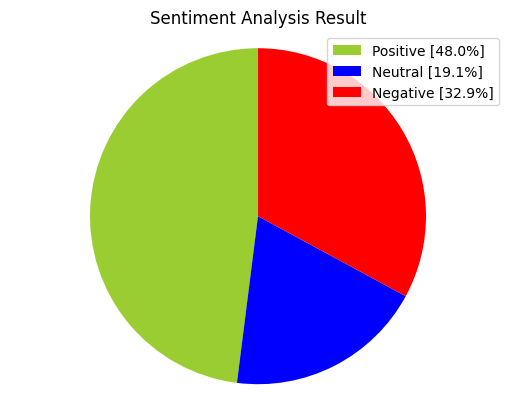

In [7]:
labels = ['Positive ['+str(positive)+'%]', 'Neutral [' +
          str(neutral)+'%]', 'Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result")
plt.axis('equal')
plt.show()

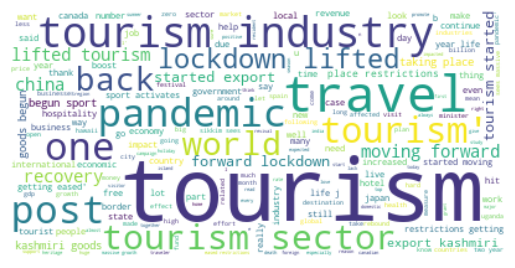

In [8]:
# Function to Create Wordcloud


def create_wordcloud(text):
    wc = WordCloud(background_color='white', max_words=3000)
    wc.generate(str(text))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()


create_wordcloud(pd.Series(positive_list).values)

